# Flatiron Phase 1 Project 1 - Microsoft Studio Movie Proposal

Project Topic: Stratgic plan on movie production for Microsoft Movie Studio <br>
Student Name: Julian(Xibei) He

## Business Understanding

The movie making industry is highly competitive. Over the past 20 years, the cost of making movie has been increasing gradually where more than half of movies fail to make profits. However, there are winners who utilized correct strategies and produced one of the most popular and profitable movie in the history. For Microsoft to break into this market, it is important to identify key aspects of successful movie and learn from these cases.

## Data Understanding 

Regarding the data provided, after the data wranglig process, we are able to identify certain correlations among multiple variables such as budget, genres, and online vote counts. 

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sqlite3 

## Question 1 Movie Production Budget vs. Profitability

### First metric generated from data

### Data Preparation

In [2]:
df_movieGross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
df_movieGross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Since there are few NaN values in these 2 columns, we simply drop the NaN values.

In [3]:
df_movieGross = df_movieGross.dropna(axis = 0, subset =['studio'])
df_movieGross = df_movieGross.dropna(axis = 0, subset = ['domestic_gross'])

There are movies that may not exported internationally, we simply fill foreign income as 0

In [4]:
df_movieGross['foreign_gross'].fillna('0', inplace = True)

Here we clean the object number and change datatype to int for future data analysis use

In [5]:
df_movieGross['domestic_gross'] = df_movieGross['domestic_gross'].astype(int)
df_movieGross['foreign_gross'] = df_movieGross['foreign_gross'].apply(lambda x: x.replace(",", ""))
df_movieGross['foreign_gross'] = df_movieGross['foreign_gross'].apply(lambda x: x.replace(".", ""))
df_movieGross['foreign_gross'] = df_movieGross['foreign_gross'].astype(int)

### Data Analysis

Adding a new 'worldwide_gross' and re-sort the column sequence

In [6]:
df_movieGross['worldwide_gross'] = df_movieGross['domestic_gross'] + df_movieGross['foreign_gross']
print(df_movieGross['domestic_gross'].corr(df_movieGross['foreign_gross']))

0.792349501241511


In [7]:
# simplify the datatable.
df_movieGross = df_movieGross.iloc[:, [0,1,2,3,5,4]]
df_movieGross

,title,studio,domestic_gross,foreign_gross,worldwide_gross,year
0,Toy Story 3,BV,415000000,652000000,1067000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,1025500000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,960300000,2010
3,Inception,WB,292600000,535700000,828300000,2010
4,Shrek Forever After,P/DW,238700000,513900000,752600000,2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200,0,6200,2018
3383,Edward II (2018 re-release),FM,4800,0,4800,2018
3384,El Pacto,Sony,2500,0,2500,2018
3385,The Swan,Synergetic,2400,0,2400,2018


### Visualization

Text(0, 0.5, 'Foreign Box Gross ($)')

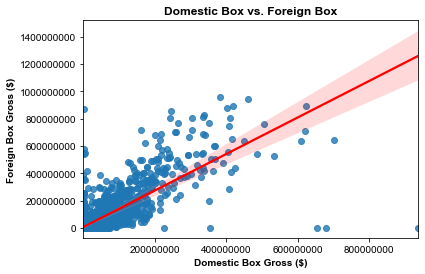

In [8]:
fig, ax = plt.subplots()
sns.set(rc= {"figure.figsize": (12,8)})
sns.regplot(x=df_movieGross['domestic_gross'], y=df_movieGross['foreign_gross'], line_kws= {"color": "red"})
ax.ticklabel_format(useOffset = False, style='plain')
ax.set_title("Domestic Box vs. Foreign Box", fontweight = 'bold' )
ax.set_xlabel("Domestic Box Gross ($)", fontweight = 'bold')
ax.set_ylabel("Foreign Box Gross ($)", fontweight = 'bold')


### Second metric generated from data

### Data Preparation

In [9]:
df_budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Clean the columns for future application.

In [10]:
# get rid of ',','$'
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].apply(lambda x: x.replace(",", ""))
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].apply(lambda x: x.replace("$", ""))
df_budget['domestic_gross'] = df_budget['domestic_gross'].apply(lambda x: x.replace(",", ""))
df_budget['domestic_gross'] = df_budget['domestic_gross'].apply(lambda x: x.replace("$", ""))
df_budget['production_budget'] = df_budget['production_budget'].apply(lambda x: x.replace(",", ""))
df_budget['production_budget'] = df_budget['production_budget'].apply(lambda x: x.replace("$", ""))

In [11]:
## We got rid of O values for budget and gross columns as the number of 0s is small.
df_budget = df_budget.loc[df_budget['domestic_gross'] != '0']
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


we are converting datatype to integer for future analysis

In [12]:
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype('int64')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype('int64')
df_budget['production_budget'] = df_budget['production_budget'].astype('int64')

<ipython-input-12-8ddc59b32711>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype('int64')
<ipython-input-12-8ddc59b32711>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget['domestic_gross'] = df_budget['domestic_gross'].astype('int64')
<ipython-input-12-8ddc59b32711>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Here we sort the data by worldwide gross number and add two column names "worldwide profit" and "ROI" metrics

### Data Analysis

In [13]:
df_budget = df_budget.sort_values('worldwide_gross', ascending=False)
df_budget['worldwide_profit'] = df_budget['worldwide_gross'] - df_budget['production_budget']
df_budget['ROI (%)'] = (df_budget['worldwide_profit'] / df_budget['production_budget']) * 100
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1004.104198
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,571.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,666.909239
...,...,...,...,...,...,...,...,...
5027,28,"Jan 1, 1993",Ed and his Dead Mother,1800000,673,673,-1799327,-99.962611
5466,67,"May 11, 2018",Higher Power,500000,528,528,-499472,-99.894400
5769,70,"Apr 1, 1996",Bang,10000,527,527,-9473,-94.730000
5518,19,"Oct 13, 2005",The Dark Hours,400000,423,423,-399577,-99.894250


Cleaning the movie for future use

In [14]:
df_budget['movie'] = df_budget['movie'].apply(lambda x: x.replace(",", ""))
df_budget['movie'] = df_budget['movie'].apply(lambda x: x.replace(".", ""))
df_budget['movie'] = df_budget['movie'].apply(lambda x: x.replace(":", ""))
df_budget['movie'] = df_budget['movie'].apply(lambda x: x.replace(" ", ""))
df_budget['movie'] = df_budget['movie'].apply(lambda x: x.replace("-", ""))

We want to find the top 5% worldside gross movies and check out their average production budget to support presentation

In [15]:
top_gross = np.percentile(df_budget['worldwide_gross'], 95)
df_top_performer = df_budget.loc[df_budget['worldwide_gross'] > top_gross]
df_top_performer['production_budget'].mean()

138201221.3740458

We adding two more columns 'release year' for future merge and 'foreign gross' for analysis

In [16]:
df_budget['release_year'] = df_budget['release_date'].str[-4:].astype(int)
df_budget['foreign_gross'] = df_budget['worldwide_gross'] - df_budget['domestic_gross']
df_budget = df_budget.drop(df_budget[df_budget['release_year'] == 2019].index)
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%),release_year,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,2009,2015837654
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1004.104198,1997,1548844451
5,6,"Dec 18, 2015",StarWarsEpVIITheForceAwakens,306000000,936662225,2053311220,1747311220,571.016739,2015,1116648995
6,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,1369318718
33,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015,996584239
...,...,...,...,...,...,...,...,...,...,...
5027,28,"Jan 1, 1993",EdandhisDeadMother,1800000,673,673,-1799327,-99.962611,1993,0
5466,67,"May 11, 2018",HigherPower,500000,528,528,-499472,-99.894400,2018,0
5769,70,"Apr 1, 1996",Bang,10000,527,527,-9473,-94.730000,1996,0
5518,19,"Oct 13, 2005",TheDarkHours,400000,423,423,-399577,-99.894250,2005,0


In [17]:
print("The correlation between production budget and worldwide profit is: ", df_budget['production_budget'].corr(df_budget['worldwide_profit']))
print("The correlation between production budget and domestic gross is: ", df_budget['production_budget'].corr(df_budget['domestic_gross']))
print("The correlation between production budget and worldwide gross is: ", df_budget['production_budget'].corr(df_budget['worldwide_gross']))

The correlation between production budget and worldwide profit is:  0.6114788177498165
The correlation between production budget and domestic gross is:  0.6822235650666475
The correlation between production budget and worldwide gross is:  0.7482112761359452


### Visualization

We try to find the upward trend in foreign gross revenue

In [18]:
# we want to see the foreign gross for the 20 years.
foreign_gross_year_2 = df_budget.groupby('release_year')['foreign_gross'].sum().sort_index(ascending=False)
foreign_gross_year_2 = foreign_gross_year_2.head(20)

Text(0.5, 1.0, 'Relationship Between Foreign Gross and Year')

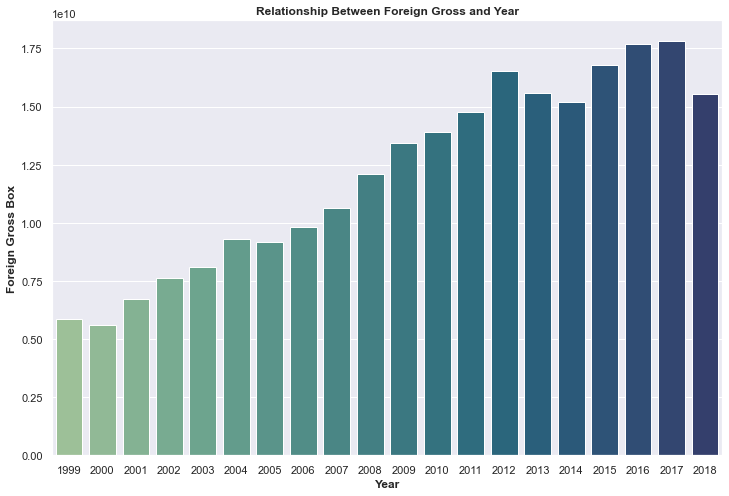

In [19]:
fig, ax = plt.subplots()

sns.set(rc= {"figure.figsize": (12,8)})
sns.barplot(x=foreign_gross_year_2.index, y=foreign_gross_year_2.values, palette = 'crest')

ax.set_xlabel('Year', fontweight = 'bold')
ax.set_ylabel('Foreign Gross Box', fontweight = 'bold')
ax.set_title('Relationship Between Foreign Gross and Year',fontweight = 'bold')

We calculated the correlation of budget with multiple profitability metrics

Text(0.5, 1.0, 'Relationship Between Production Budget and Box Office Number')

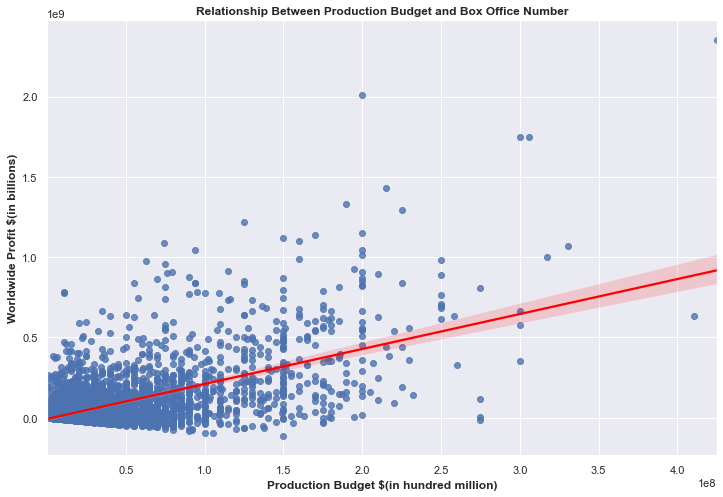

In [20]:
fig, ax = plt.subplots()

sns.set(rc= {"figure.figsize": (12,8)})
sns.regplot(x=df_budget['production_budget'], y=df_budget['worldwide_profit'], line_kws= {"color": "red"})

ax.set_xlabel('Production Budget $(in hundred million)', fontweight = 'bold')
ax.set_ylabel('Worldwide Profit $(in billions)', fontweight = 'bold')
ax.set_title('Relationship Between Production Budget and Box Office Number', fontweight = 'bold')

## Question 2 Online Vote Count vs. Popularity

### Data Preparation

In [21]:
df_tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")
df_tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### Data Analysis

We dropped the data where vote count < 10, so the data we collect has more representative meaning. <br>
We then calculate the correlation between 2 variables: vote count and popularity.

In [22]:
df_tmdb = df_tmdb.sort_values('vote_average', ascending=False)
df_tmdb = df_tmdb.drop(df_tmdb[df_tmdb['vote_count'] < 10].index)
print("The correlation between online vote count and popularity index is: ", df_tmdb['vote_count'].corr(df_tmdb['popularity']))

The correlation between online vote count and popularity index is:  0.7156083806788975


### Visualization

Text(0, 0.5, 'Popularity Index')

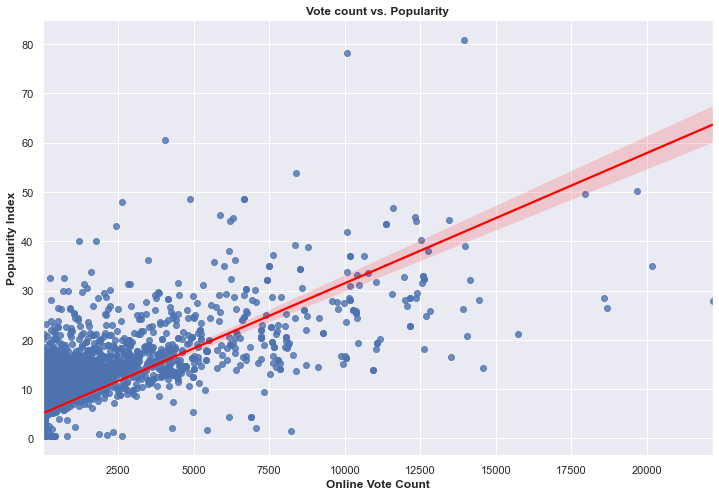

In [23]:
fig, ax = plt.subplots()
sns.set(rc= {"figure.figsize": (12,8)})
sns.regplot(x=df_tmdb['vote_count'], y=df_tmdb['popularity'], line_kws= {"color": "red"})

ax.set_title("Vote count vs. Popularity", fontweight = 'bold' )
ax.set_xlabel("Online Vote Count", fontweight = 'bold')
ax.set_ylabel("Popularity Index", fontweight = 'bold')


## Question 3 Movie Profitability vs. Genre

### Data Preparation

### IMDB Database

Exploring the structure of IMDB database

In [24]:
conn = sqlite3.connect('zippedData/im.db/im.db')

In [25]:
query = '''
    SELECT *
    FROM sqlite_master
    
'''

pd.read_sql(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [26]:
movie_basics = '''
    SELECT *
    FROM movie_basics
    
'''

df_movie_basics = pd.read_sql(movie_basics, conn)
df_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


We dropped NaN values from these 2 columns as the size of NaN is small compared to the data size

In [27]:
df_movie_basics = df_movie_basics.dropna(axis = 0, subset = ['original_title'])
df_movie_basics = df_movie_basics.dropna(axis = 0, subset = ['genres'])
df_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


Exploring the moview rating data table.

In [28]:
movie_ratings = '''
    SELECT *
    FROM movie_ratings
    
    
'''
df_movie_ratings = pd.read_sql(movie_ratings, conn)
df_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Here we merge 2 tables on column of movie_id to further analysis

In [29]:
df_movie_basics_reviews = df_movie_basics.merge(df_movie_ratings, on = 'movie_id', how = 'left')
df_movie_basics_reviews

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
140729,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",NaN,NaN
140730,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
140731,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
140732,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN


Cleaning up the title string for further merge with movie budget table

In [30]:
df_movie_basics_reviews['primary_title'] = df_movie_basics_reviews['primary_title'].apply(lambda x: x.replace(",", ""))
df_movie_basics_reviews['primary_title'] = df_movie_basics_reviews['primary_title'].apply(lambda x: x.replace(".", ""))
df_movie_basics_reviews['primary_title'] = df_movie_basics_reviews['primary_title'].apply(lambda x: x.replace(":", ""))
df_movie_basics_reviews['primary_title'] = df_movie_basics_reviews['primary_title'].apply(lambda x: x.replace(" ", ""))
df_movie_basics_reviews['primary_title'] = df_movie_basics_reviews['primary_title'].apply(lambda x: x.replace("-", ""))

### Data Analysis

In [31]:
# merge on 2 tables based on movie name and release year. Used inner merge to find out the overlapped section that 
# contains the information needed to analysis

df_movie_reviews_budget = df_budget.merge(df_movie_basics_reviews,
                                         left_on = ['movie', 'release_year'],
                                         right_on = ['primary_title','start_year'],
                                         how = 'inner'
                                         )
df_movie_reviews_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%),release_year,foreign_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,1369318718,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
1,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015,996584239,tt0369610,JurassicWorld,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
2,67,"Apr 3, 2015",Furious7,190000000,353007020,1518722794,1328722794,699.327786,2015,1165715774,tt2820852,Furious7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074.0
3,27,"May 4, 2012",TheAvengers,225000000,623279547,1517935897,1292935897,574.638176,2012,894656350,tt0848228,TheAvengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
4,4,"May 1, 2015",AvengersAgeofUltron,330600000,459005868,1403013963,1072413963,324.384139,2015,944008095,tt2395427,AvengersAgeofUltron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,74,"Oct 26, 2012",TheGhastlyLoveofJohnnyX,2000000,2436,2436,-1997564,-99.878200,2012,0,tt1754633,TheGhastlyLoveofJohnnyX,The Ghastly Love of Johnny X,2012,106.0,"Comedy,Fantasy,Musical",5.7,386.0
1344,65,"Sep 10, 2014",BorntoFlyElizabethStrebvsGravity,500000,1822,1822,-498178,-99.635600,2014,0,tt2246526,BorntoFlyElizabethStrebvsGravity,Born to Fly: Elizabeth Streb vs. Gravity,2014,82.0,"Action,Biography,Documentary",6.7,47.0
1345,58,"Oct 23, 2015",TheLookingGlass,300000,1711,1711,-298289,-99.429667,2015,0,tt2912776,TheLookingGlass,The Looking Glass,2015,110.0,"Drama,Music",5.8,156.0
1346,1,"Dec 14, 2018",ThatWayMadnessLies,650000,1447,1447,-648553,-99.777385,2018,0,tt6264264,ThatWayMadnessLies,That Way Madness Lies...,2018,101.0,"Documentary,Drama",6.8,17.0


In [32]:
df_movie_reviews_budget = df_movie_reviews_budget.dropna(axis=0, subset=['averagerating'])
df_movie_reviews_budget = df_movie_reviews_budget.dropna(axis=0, subset=['numvotes'])
df_movie_reviews_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%),release_year,foreign_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,1369318718,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
1,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015,996584239,tt0369610,JurassicWorld,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
2,67,"Apr 3, 2015",Furious7,190000000,353007020,1518722794,1328722794,699.327786,2015,1165715774,tt2820852,Furious7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074.0
3,27,"May 4, 2012",TheAvengers,225000000,623279547,1517935897,1292935897,574.638176,2012,894656350,tt0848228,TheAvengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
4,4,"May 1, 2015",AvengersAgeofUltron,330600000,459005868,1403013963,1072413963,324.384139,2015,944008095,tt2395427,AvengersAgeofUltron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,74,"Oct 26, 2012",TheGhastlyLoveofJohnnyX,2000000,2436,2436,-1997564,-99.878200,2012,0,tt1754633,TheGhastlyLoveofJohnnyX,The Ghastly Love of Johnny X,2012,106.0,"Comedy,Fantasy,Musical",5.7,386.0
1344,65,"Sep 10, 2014",BorntoFlyElizabethStrebvsGravity,500000,1822,1822,-498178,-99.635600,2014,0,tt2246526,BorntoFlyElizabethStrebvsGravity,Born to Fly: Elizabeth Streb vs. Gravity,2014,82.0,"Action,Biography,Documentary",6.7,47.0
1345,58,"Oct 23, 2015",TheLookingGlass,300000,1711,1711,-298289,-99.429667,2015,0,tt2912776,TheLookingGlass,The Looking Glass,2015,110.0,"Drama,Music",5.8,156.0
1346,1,"Dec 14, 2018",ThatWayMadnessLies,650000,1447,1447,-648553,-99.777385,2018,0,tt6264264,ThatWayMadnessLies,That Way Madness Lies...,2018,101.0,"Documentary,Drama",6.8,17.0


### Visualization

In [33]:
# we groupby the 'genres', and check out the first 10 mix. 
genre_rank_mul = df_movie_reviews_budget.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False)
genre_rank_mul = genre_rank_mul.head(10)

Text(0.5, 1.0, 'Relationship Between Worldwid Box and Genre Mix')

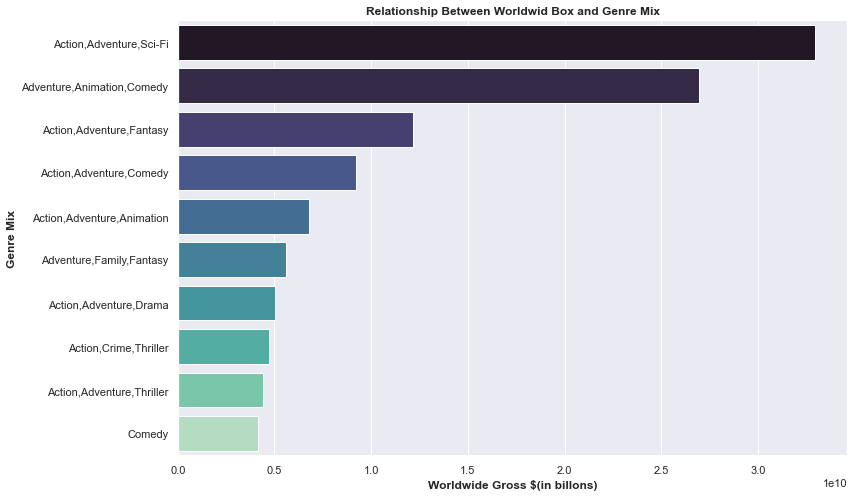

In [34]:
fig, ax = plt.subplots()

sns.set(rc= {"figure.figsize": (12,8)})
sns.barplot(x=genre_rank_mul.values, y=genre_rank_mul.index, palette = 'mako')

ax.set_xlabel('Worldwide Gross $(in billons)', fontweight = 'bold')
ax.set_ylabel('Genre Mix', fontweight = 'bold')
ax.set_title('Relationship Between Worldwid Box and Genre Mix', fontweight = 'bold')

We also want to see how individual genre is doing in terms of box gross number.

In [35]:
# We use explode function and groupby to find out each genre's total sales.
df_movie_reviews_budget['genres'] = df_movie_reviews_budget['genres'].str.split(',')
df_movie_reviews_budget = df_movie_reviews_budget.explode('genres')
df_movie_reviews_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%),release_year,foreign_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,1369318718,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,Action,8.5,670926.0
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,1369318718,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,Adventure,8.5,670926.0
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,1369318718,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,Sci-Fi,8.5,670926.0
1,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015,996584239,tt0369610,JurassicWorld,Jurassic World,2015,124.0,Action,7.0,539338.0
1,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015,996584239,tt0369610,JurassicWorld,Jurassic World,2015,124.0,Adventure,7.0,539338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1,"Dec 14, 2018",ThatWayMadnessLies,650000,1447,1447,-648553,-99.777385,2018,0,tt6264264,ThatWayMadnessLies,That Way Madness Lies...,2018,101.0,Documentary,6.8,17.0
1346,1,"Dec 14, 2018",ThatWayMadnessLies,650000,1447,1447,-648553,-99.777385,2018,0,tt6264264,ThatWayMadnessLies,That Way Madness Lies...,2018,101.0,Drama,6.8,17.0
1347,67,"May 11, 2018",HigherPower,500000,528,528,-499472,-99.894400,2018,0,tt2924392,HigherPower,Higher Power,2018,93.0,Action,5.3,2152.0
1347,67,"May 11, 2018",HigherPower,500000,528,528,-499472,-99.894400,2018,0,tt2924392,HigherPower,Higher Power,2018,93.0,Sci-Fi,5.3,2152.0


In [36]:
genre_rank = df_movie_reviews_budget.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False)
genre_rank

genres
Adventure      121529720982
Action         105632882448
Comedy          68230605456
Drama           53871092002
Sci-Fi          44657522041
Animation       37270207021
Fantasy         30708630483
Thriller        29665242308
Crime           18743438764
Family          17182163626
Horror          12831509577
Romance         12602592435
Mystery         11126508183
Biography       10638966436
Music            3546157290
History          3413213036
Musical          2874302681
Sport            1751652056
Western          1151208373
War               981814622
Documentary       908921323
Name: worldwide_gross, dtype: int64

Text(0.5, 1.0, 'Relationship Between Worldwid Box and Genre')

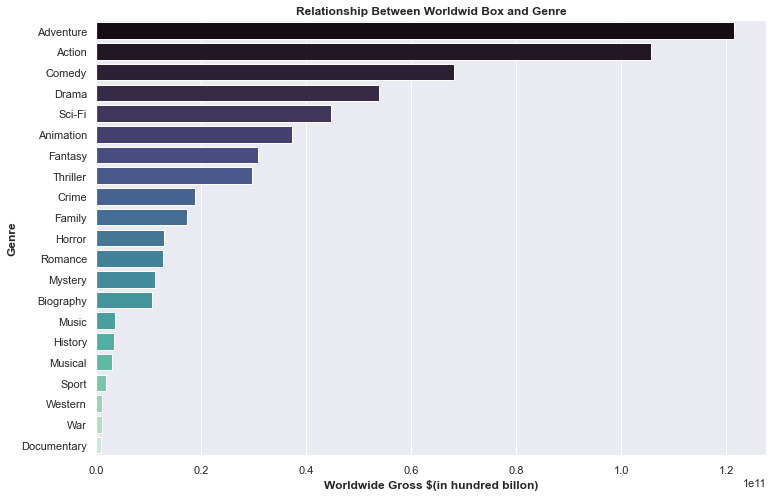

In [37]:
fig, ax = plt.subplots()

sns.set(rc= {"figure.figsize": (12,8)})
sns.barplot(x=genre_rank.values, y=genre_rank.index, palette = 'mako')

ax.set_xlabel('Worldwide Gross $(in hundred billon)', fontweight = 'bold')
ax.set_ylabel('Genre', fontweight = 'bold')
ax.set_title('Relationship Between Worldwid Box and Genre', fontweight = 'bold')

### Second metric to question 2: Popularity of movie

We found out that a positive correlation between production budget and online vote count, which implies that the higher <br>
budget the movie gets, the higher online exposure it will receive.

Text(0.5, 1.0, 'Relationship Between Production Budget and Audience Votes')

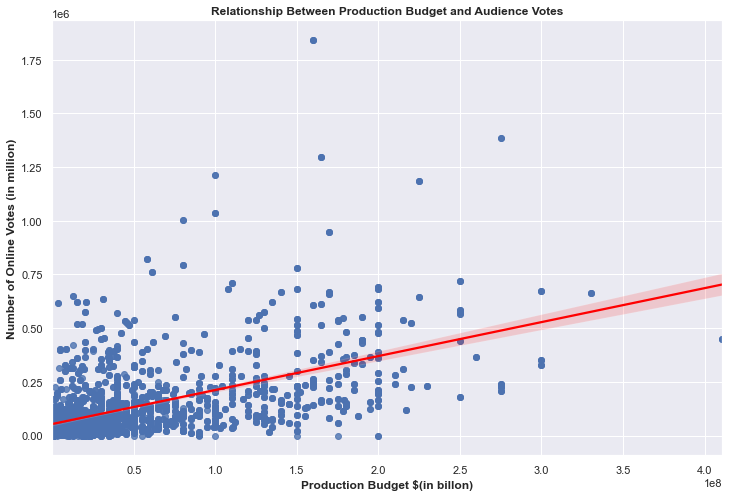

In [38]:
fig, ax = plt.subplots()

sns.set(rc= {"figure.figsize": (12,8)})
sns.regplot(x=df_movie_reviews_budget['production_budget'], y=df_movie_reviews_budget['numvotes'], line_kws= {"color": "red"})

ax.set_xlabel('Production Budget $(in billon)', fontweight = 'bold')
ax.set_ylabel('Number of Online Votes (in million)', fontweight = 'bold')
ax.set_title('Relationship Between Production Budget and Audience Votes', fontweight = 'bold')

## Exploring the rest of data

We checked the data from these tables and would them for future analysis.

In [39]:
directors = '''
    SELECT *
    FROM directors
    
'''

pd.read_sql(directors, conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [40]:
known_for = '''
    SELECT *
    FROM known_for
    
'''

pd.read_sql(known_for, conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [41]:
movie_akas = '''
    SELECT *
    FROM movie_akas
    
'''

df_movie_akas = pd.read_sql(movie_akas, conn)
df_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [42]:
persons = '''
    SELECT *
    FROM persons
    
'''

df_persons = pd.read_sql(persons, conn)
df_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [43]:
principals = '''
    SELECT *
    FROM principals
    
'''

df_principals = pd.read_sql(principals, conn)
df_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [44]:
writers = '''
    SELECT *
    FROM writers
    
'''

pd.read_sql(writers, conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [45]:
df_rt2 = pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter = "\t", encoding = "unicode-escape")
df_rt2

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [46]:
df_rt = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter = '\t', error_bad_lines = False )
df_rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## Conclusions

**The 1st recommendation:** we recommend Microsoft Movie Studio to make their first moview with a higher production budget <br>
Top 5% of movies that generated the most revenues invest $140,000,000 on average. 

**The 2nd recommendation:** Get as much exposure for the first movie. Spend at least industry average level to marketing to increase online exposure, which is directly related to the popularity of a movie.

**The 3rd recommendation:** Make a movie across multiple genres. More genres means more exposure to different audiences. 

## Looking Forward

To further elaborate current strategy, I’d like to include an analysis of macro factors. <br>

**Social media** <br>
it is an area that changing very fast and how to leverage social media to increase exposure is key for movie studios. <br>

**Online streaming platform** <br>
This Market has transformed from Netflix being No.1 to Netflix, HBO, Disney Plus and many other small ones competing. I expect the competition will only get more fierce and that would help movie studio to diversify the pipelines of revenue streams. <br>

**Social aspects** <br>
We are living in a world that is changing very fast. People could be talking totally different topics in a matter of 5 years or even 3 years. How to capture the hot topics of each time would also be a main task for every studio.
